# **Fundamentals of Deep Learning**

**Asssignment 01**

**Name: Shihab Muhtasim**

**Neptun Code: V1AM6K**

# **LOADING Visualize.py File**  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualise_nonlin(fun, X, Y, resolution=50):
    """
    Visualises the dataset together with the separator

    Example usage:

        def hypothesis(x):
            return np.sign(x @ w)
        visualise_nonlin(hypothesis, X, Y)

    # Parameters
    fun (callable): a function that outputs, for each sample in the argument
        array X, the class it belongs to (this is your hypothesis in Python
        function form). The class should be -1 or +1.
    X (array-like): an Nx2 matrix of input elements
    Y (array-like): an Nx1 matrix of labels
    """
    fig, ax = plt.subplots()
    # Data
    plot_data(X, Y, ax)
    # Separator
    x = np.linspace(-5, 5, resolution)
    xx, yy = np.meshgrid(x, x)
    grid = np.c_[xx.flatten(), yy.flatten()]
    decisions = fun(grid)
    ax.contour(
        xx, yy, decisions.reshape(resolution, resolution), levels=np.array([0]))
    # Annotations
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.grid(True)
    fig.tight_layout()
    return fig, ax

def plot_data(X, Y, ax):
    positive_samples = X[Y[:, 0] == 1, :]
    negative_samples = X[Y[:, 0] == -1, :]
    ax.plot(positive_samples[:, 0], positive_samples[:, 1], 'x', label='$+1$')
    ax.plot(negative_samples[:, 0], negative_samples[:, 1], 'o', label='$-1$')


# **TASK 1 (A)**

X shape: (500, 2)
Y shape: (500, 1)


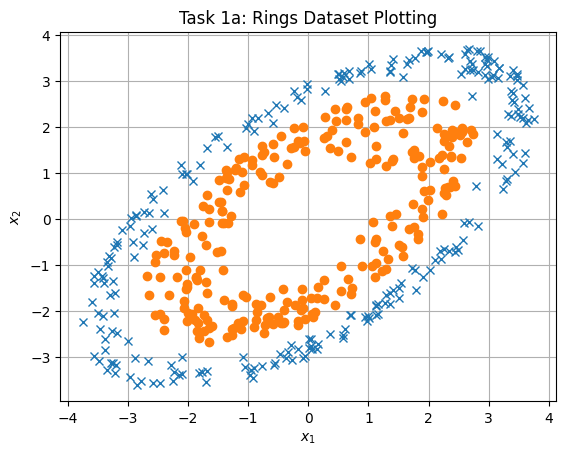

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset
data = np.load("/content/drive/MyDrive/ppke courses/FDP/lab task 1/rings.npz")
X = data["X"]                 # Input features (2D points)
Y = data["Y"]                 # Labels (+1 or -1)

# shapes
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# Plotting the data using the helper function
fig, ax = plt.subplots()
plot_data(X, Y, ax)
ax.set_title("Task 1a: Rings Dataset Plotting")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid(True)
plt.show()


# ** TASK 1 (B) **

Task 1(b): Linear Logistic Regression Classifier
Training error (E_in):  0.446
Test error (E_out):     0.487


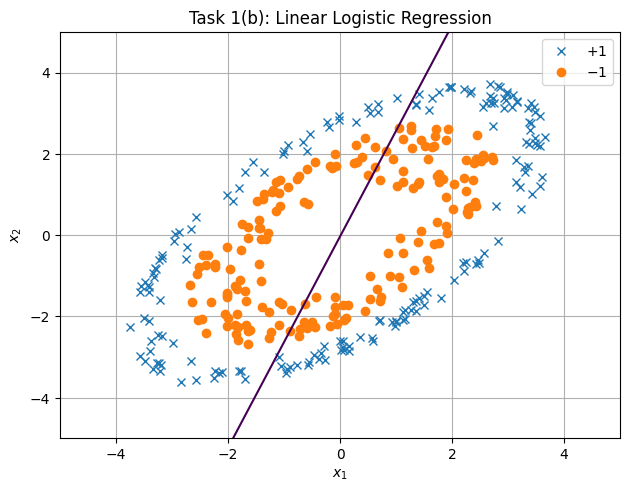

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

# Train
logit = LogisticRegression(solver='liblinear', random_state=42)
logit.fit(X_train, Y_train.ravel())

# Predictions
train_pred = logit.predict(X_train)
test_pred = logit.predict(X_test)

# Compute errors
E_in = np.mean(train_pred != Y_train.ravel())
E_out = np.mean(test_pred != Y_test.ravel())

# Print results
print("Task 1(b): Linear Logistic Regression Classifier")
print(f"Training error (E_in):  {E_in:.3f}")
print(f"Test error (E_out):     {E_out:.3f}")

# Define hypothesis for visualization (decision boundary)
def hypothesis_linear(X_input):
    return logit.decision_function(X_input)

# Visualize decision boundary using training data
visualise_nonlin(hypothesis_linear, X_train, Y_train)
plt.title(f"Task 1(b): Linear Logistic Regression")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

# **TASK 1 (C)**

Task 1(c): Logistic Regression with Norm Feature
Training error (E_in):  0.231
Test error (E_out):     0.253


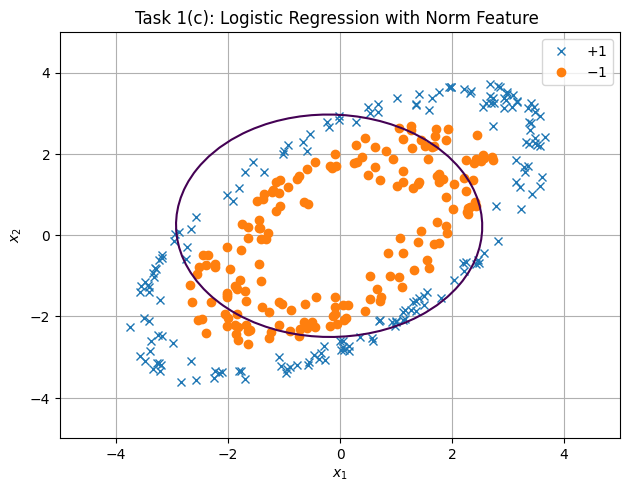

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Add the norm as a new feature
norm_feature = np.linalg.norm(X, axis=1).reshape(-1, 1)
X_with_norm = np.hstack((X, norm_feature))

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_with_norm, Y, test_size=0.3, random_state=42)

# Train
clf_norm = LogisticRegression(solver='liblinear', random_state=42)
clf_norm.fit(X_train, Y_train.ravel())

# Predictions
train_pred = clf_norm.predict(X_train)
test_pred = clf_norm.predict(X_test)

# Compute errors
E_in = np.mean(train_pred != Y_train.ravel())
E_out = np.mean(test_pred != Y_test.ravel())

# Print results
print("Task 1(c): Logistic Regression with Norm Feature")
print(f"Training error (E_in):  {E_in:.3f}")
print(f"Test error (E_out):     {E_out:.3f}")

# Define hypothesis function for visualization
def hypothesis_norm(X_input):
    r = np.linalg.norm(X_input, axis=1).reshape(-1, 1)
    X_aug = np.hstack((X_input, r))
    return clf_norm.decision_function(X_aug)

# Visualize decision boundary (training data)
visualise_nonlin(hypothesis_norm, X_train[:, :2], Y_train)
plt.title(f"Task 1(c): Logistic Regression with Norm Feature ")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

# **TASK 1 (D)**

Task 1(d): Logistic Regression with Polynomial (Degree 2) Features
Training error (E_in):  0.000
Test error (E_out):     0.000


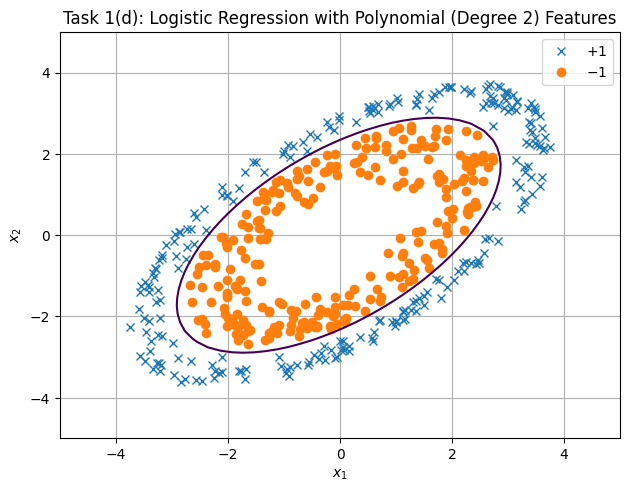

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create polynomial features
x1 = X[:, 0].reshape(-1, 1)
x2 = X[:, 1].reshape(-1, 1)
x1_sq = x1 ** 2
x1x2 = x1 * x2
x2_sq = x2 ** 2

# Combine
X_poly = np.hstack((x1, x2, x1_sq, x1x2, x2_sq))

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42)

# Train
clf_poly = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
clf_poly.fit(X_train, Y_train.ravel())

# Predictions
train_pred = clf_poly.predict(X_train)
test_pred = clf_poly.predict(X_test)

# Compute errors
E_in = np.mean(train_pred != Y_train.ravel())
E_out = np.mean(test_pred != Y_test.ravel())

# Print results
print("Task 1(d): Logistic Regression with Polynomial (Degree 2) Features")
print(f"Training error (E_in):  {E_in:.3f}")
print(f"Test error (E_out):     {E_out:.3f}")

# hypothesis for visualization
def hypothesis_poly(X_input):
    x1 = X_input[:, 0].reshape(-1, 1)
    x2 = X_input[:, 1].reshape(-1, 1)
    x1_sq = x1 ** 2
    x1x2 = x1 * x2
    x2_sq = x2 ** 2
    X_aug = np.hstack((x1, x2, x1_sq, x1x2, x2_sq))
    return clf_poly.decision_function(X_aug)

# Visualize decision boundary
visualise_nonlin(hypothesis_poly, X[:, :2], Y)
plt.title(f"Task 1(d): Logistic Regression with Polynomial (Degree 2) Features")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

# ** TASK 2**

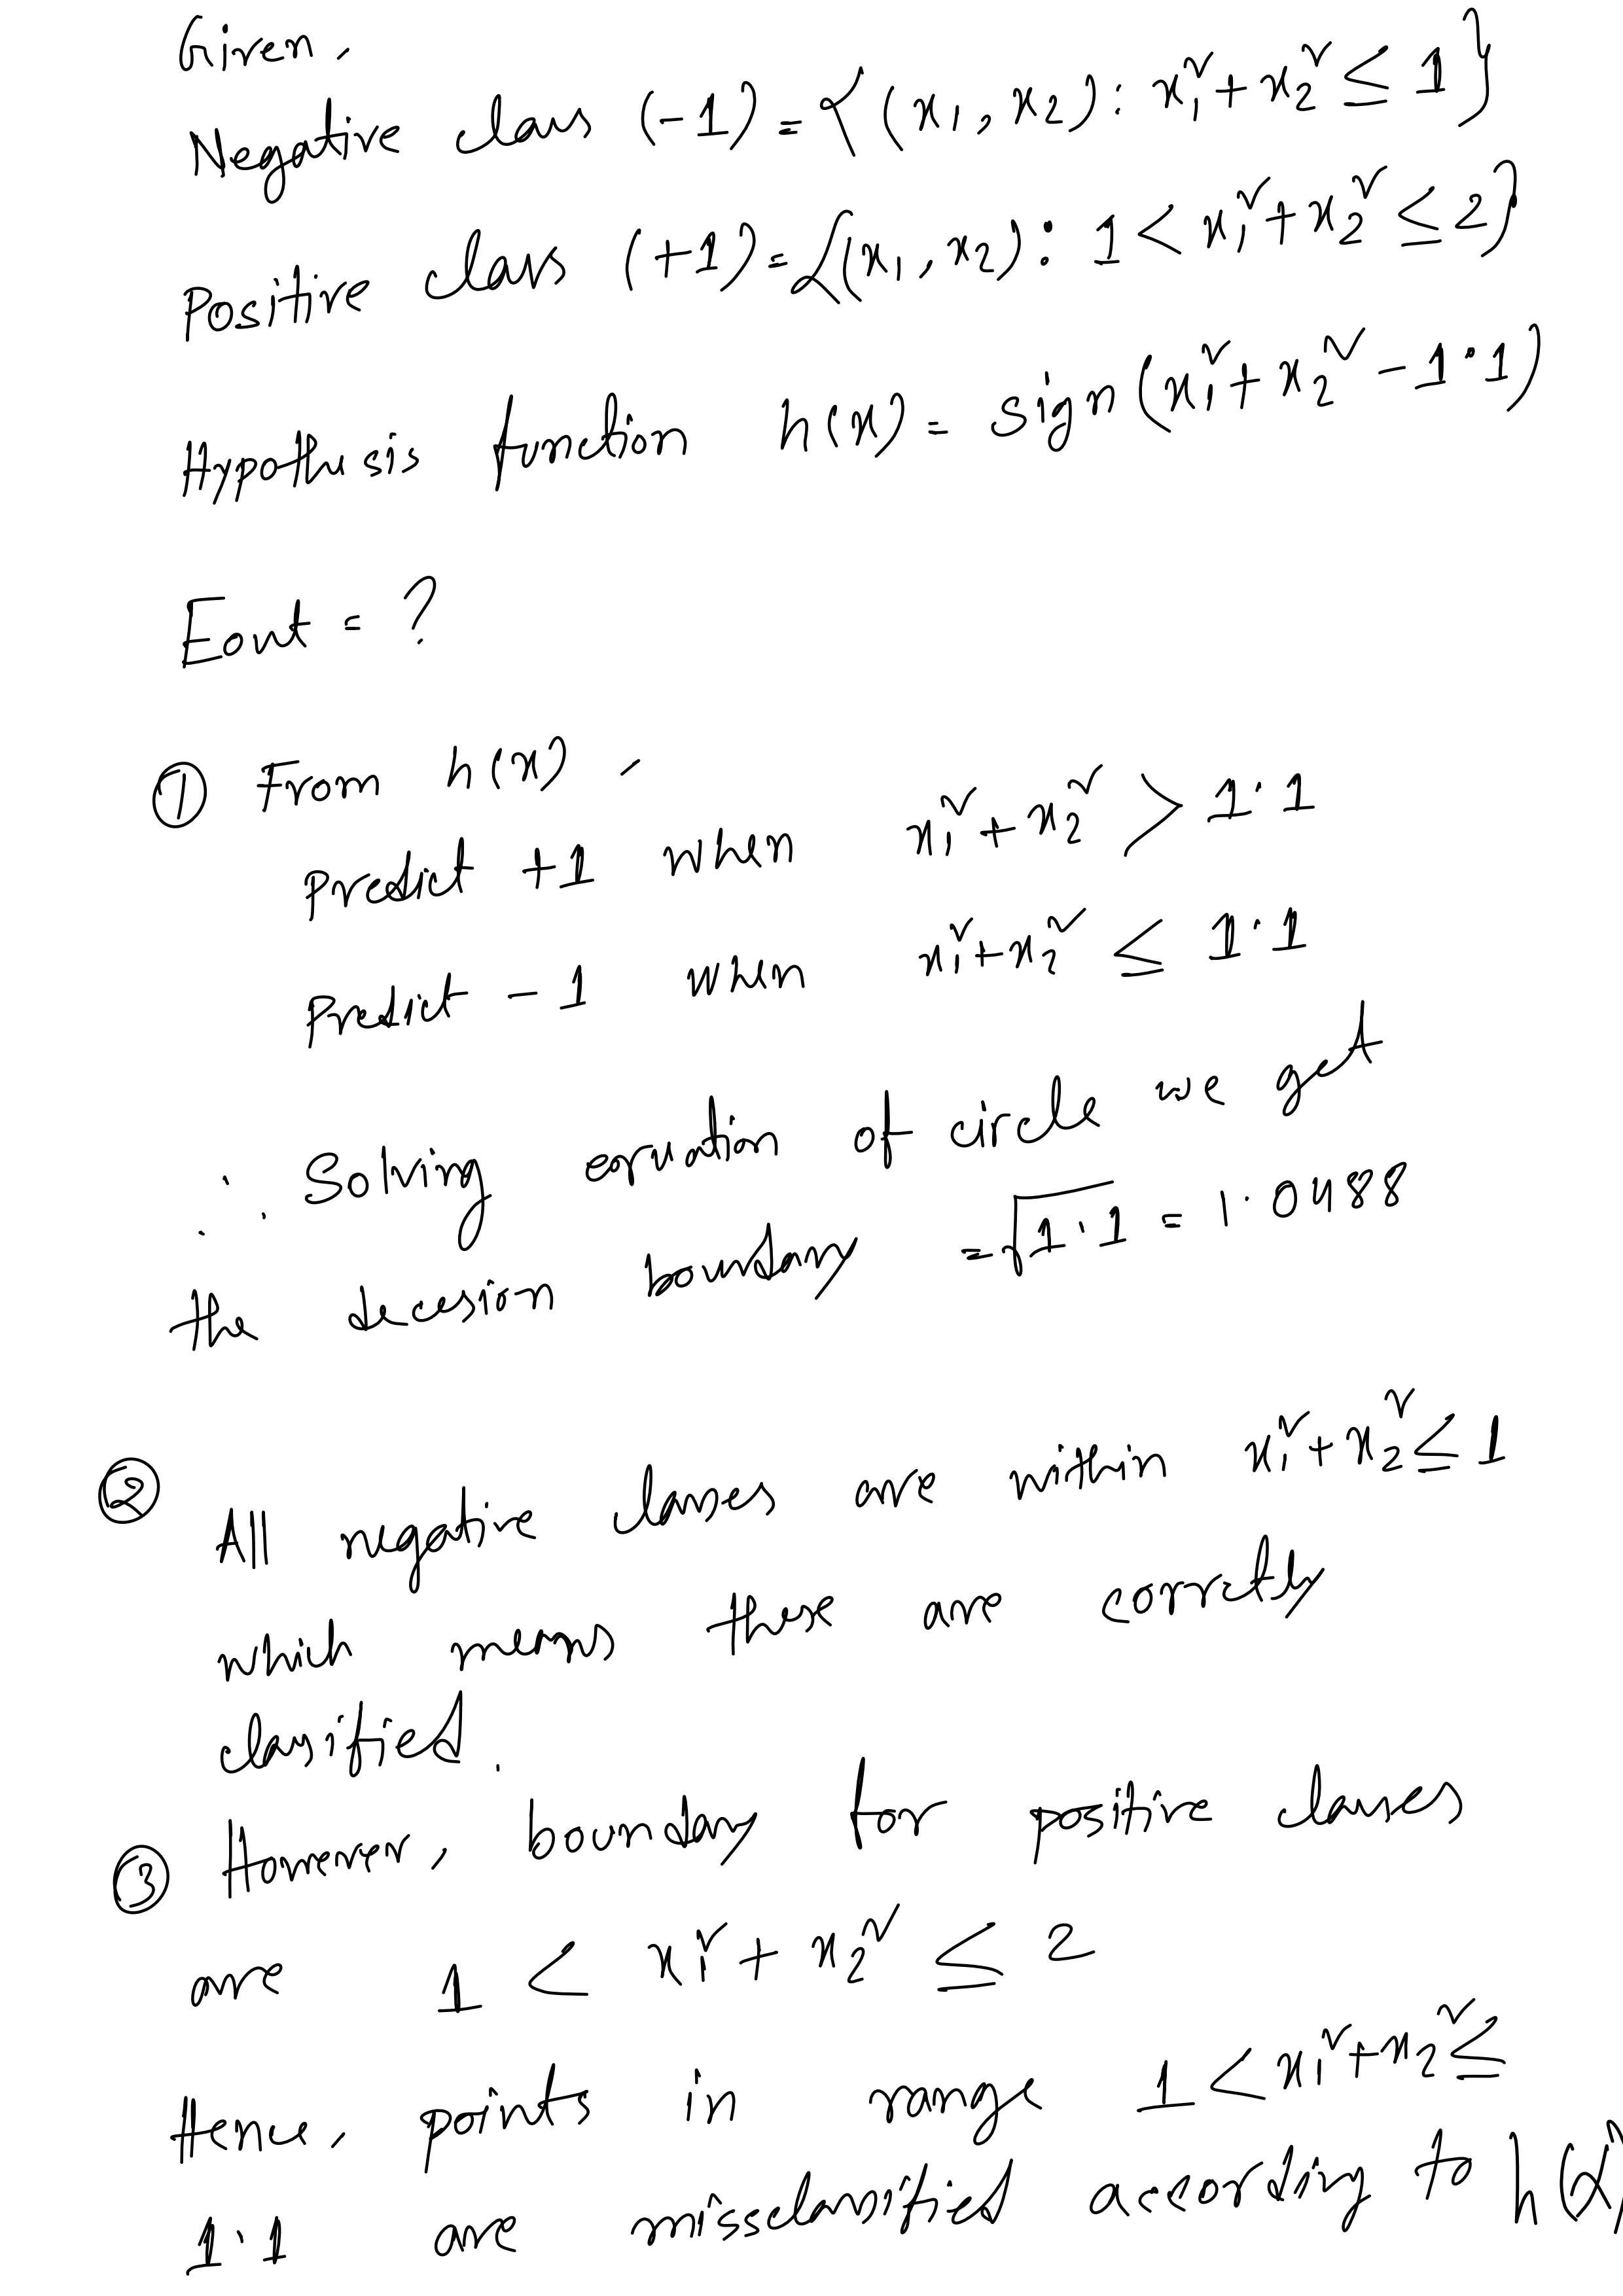

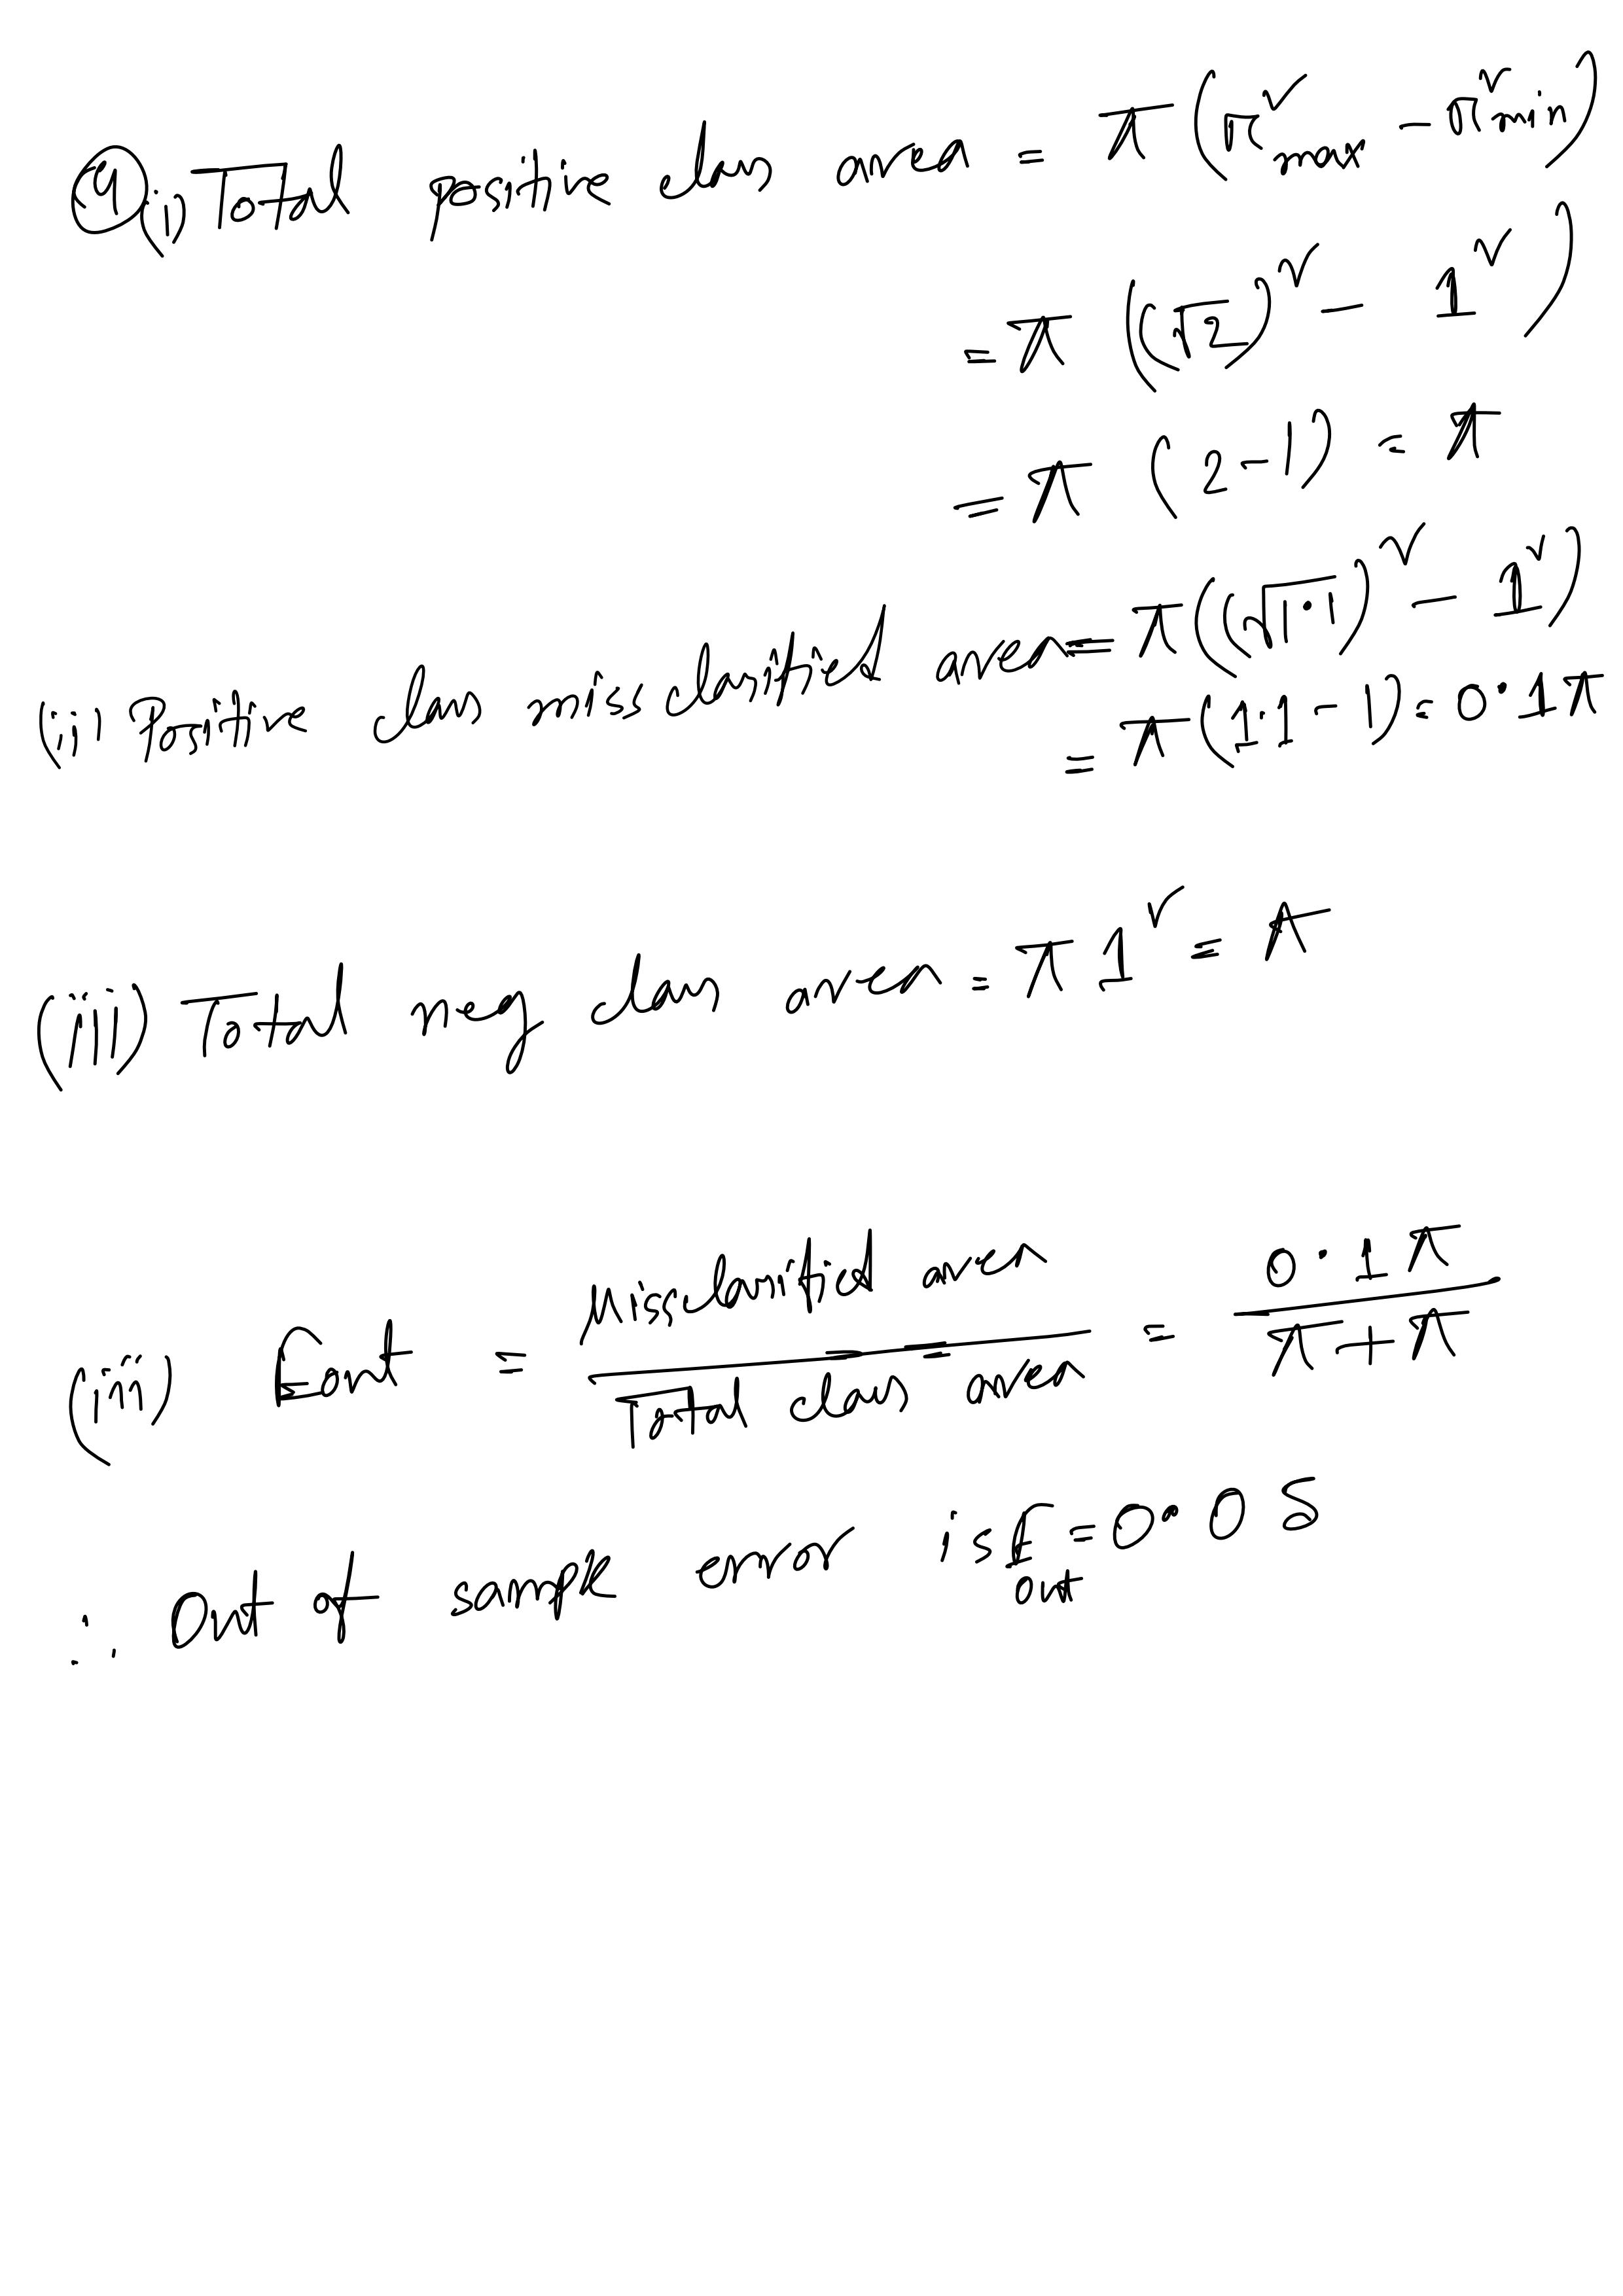

# **TASK 4 (A)**

In [ ]:
import numpy as np

data = np.load("/content/drive/MyDrive/ppke courses/FDP/lab task 1/rings.npz")
X = data["X"]
Y = data["Y"]

# Convert labels for logistic regression
Y_bin = (Y + 1) / 2

# Add bias term
X_bias = np.hstack((np.ones((X.shape[0],1)), X))  # shape: (N,3)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression error
def compute_error(w, X, Y):
    N = X.shape[0]
    h = sigmoid(X @ w)
    eps = 1e-10
    return -np.mean(Y*np.log(h+eps) + (1-Y)*np.log(1-h+eps))

# Correct analytical gradient
def compute_gradient(w, X, Y):
    N = X.shape[0]
    h = sigmoid(X @ w)
    return (X.T @ (h - Y)) / N

# Finite difference gradient
def finite_difference_gradient(w, X, Y, epsilon=1e-5):
    grad_est = np.zeros_like(w)
    for i in range(len(w)):
        w_plus = np.copy(w)
        w_minus = np.copy(w)
        w_plus[i] += epsilon/2
        w_minus[i] -= epsilon/2
        f_plus = compute_error(w_plus, X, Y)
        f_minus = compute_error(w_minus, X, Y)
        grad_est[i] = (f_plus - f_minus) / epsilon
    return grad_est

# Random initial weights
np.random.seed(0)
w = np.random.randn(X_bias.shape[1],1)

# Compute gradients
grad_exact = compute_gradient(w, X_bias, Y_bin)
grad_fd = finite_difference_gradient(w, X_bias, Y_bin)

print("Correct Gradient Check")
print("Analytical Gradient:\n", grad_exact.flatten())
print("Finite Difference Gradient:\n", grad_fd.flatten())
print("Difference:", np.linalg.norm(grad_exact - grad_fd))

# Introduce deliberate error
def compute_gradient_error(w, X, Y):
    N = X.shape[0]
    h = sigmoid(X @ w)
    return -(X.T @ (h - Y)) / N  # wrong sign

grad_wrong = compute_gradient_error(w, X_bias, Y_bin)
print("\n Gradient with deliberate error")
print("Incorrect Analytical Gradient:\n", grad_wrong.flatten())
print("Finite Difference Gradient:\n", grad_fd.flatten())
print("Difference:", np.linalg.norm(grad_wrong - grad_fd))



Correct Gradient Check
Analytical Gradient:
 [0.20671322 0.41016739 0.56790415]
Finite Difference Gradient:
 [0.20671321 0.41016739 0.56790414]
Difference: 3.569995487774485e-09

 Gradient with deliberate error
Incorrect Analytical Gradient:
 [-0.20671322 -0.41016739 -0.56790415]
Finite Difference Gradient:
 [0.20671321 0.41016739 0.56790414]
Difference: 1.4607980865821266


# ** TASK 4(B)**

In [ ]:
import numpy as np

data = np.load("/content/drive/MyDrive/ppke courses/FDP/lab task 1/rings.npz")
X = data["X"]
Y = data["Y"]
Y_bin = (Y + 1) / 2

# Add bias term
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # (N, 3)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_error(w, X, Y):
    h = sigmoid(X @ w)
    eps = 1e-10
    return -np.mean(Y * np.log(h + eps) + (1 - Y) * np.log(1 - h + eps))

def compute_gradient(w, X, Y):
    h = sigmoid(X @ w)
    return (X.T @ (h - Y)) / X.shape[0]


def random_projection_gradient_test(X, Y, epsilon=1e-5, num_tests=5):

    np.random.seed(42)
    m = X.shape[1]

    for t in range(num_tests):
        # Random direction vectors
        v = np.random.randn(m, 1)
        u = np.random.randn(1, 1)  # scalar since f is scalar

        # Random weight vector
        w = np.random.randn(m, 1)

        # wrapper function
        def f(x_scalar):
            return u * compute_error(w + v * x_scalar, X, Y)

        # Finite difference derivative
        f_plus = f(epsilon / 2)
        f_minus = f(-epsilon / 2)
        finite_diff = (f_plus - f_minus) / epsilon

        # Analytical directional derivative: u^T J_g(vx) v
        grad = compute_gradient(w, X, Y)
        directional_derivative = u * (grad.T @ v)

        print(f"Test {t+1}:")
        print("  Finite difference derivative :", float(finite_diff))
        print("  Analytical directional deriv. :", float(directional_derivative))
        print("  Difference :", abs(float(finite_diff - directional_derivative)))
        print("-" * 50)

random_projection_gradient_test(X_bias, Y_bin)

Test 1:
  Finite difference derivative : 0.6832517156052375
  Analytical directional deriv. : 0.683251719344524
  Difference : 3.739286547066456e-09
--------------------------------------------------
Test 2:
  Finite difference derivative : 0.13540510279685947
  Analytical directional deriv. : 0.1354051087481358
  Difference : 5.951276332849531e-09
--------------------------------------------------
Test 3:
  Finite difference derivative : 0.011364054564033664
  Analytical directional deriv. : 0.011364054978611406
  Difference : 4.1457774192787955e-10
--------------------------------------------------
Test 4:
  Finite difference derivative : -0.16901623764997709
  Analytical directional deriv. : -0.1690162379254089
  Difference : 2.7543181624345436e-10
--------------------------------------------------
Test 5:
  Finite difference derivative : 0.1259552105281614
  Analytical directional deriv. : 0.12595521067383408
  Difference : 1.4567269612797418e-10
-----------------------------------

/tmp/ipython-input-4128185178.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("  Finite difference derivative :", float(finite_diff))
/tmp/ipython-input-4128185178.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("  Analytical directional deriv. :", float(directional_derivative))
/tmp/ipython-input-4128185178.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("  Difference :", abs(float(finite_diff - directional_derivative)))


In [ ]:
import numpy as np


data = np.load("/content/drive/MyDrive/ppke courses/FDP/lab task 1/rings.npz")
X = data["X"]      # shape (N, 2)
Y = data["Y"]      # shape (N, 1)

# Convert labels {-1, +1} to {0, 1}
Y_bin = (Y + 1) / 2

# Add bias term
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # shape (N, 3)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression error function (Ein)
def compute_error(w, X, Y):
    h = sigmoid(X @ w)
    eps = 1e-10  # small value to avoid log(0)
    return -np.mean(Y * np.log(h + eps) + (1 - Y) * np.log(1 - h + eps))

# Analytical gradient (true derivative)
def compute_gradient(w, X, Y):
    h = sigmoid(X @ w)
    return (X.T @ (h - Y)) / X.shape[0]

#  Complex-step gradient approximation

def complex_step_gradient(w, X, Y, epsilon=1e-20):
    grad_cs = np.zeros_like(w, dtype=float)
    for i in range(len(w)):
        w_complex = w.astype(complex)
        w_complex[i] += 1j * epsilon  # small imaginary step in i-th direction
        grad_cs[i] = np.imag(compute_error(w_complex, X, Y)) / epsilon
    return grad_cs


# gradient comparison

np.random.seed(0)
w = np.random.randn(X_bias.shape[1], 1)

grad_analytical = compute_gradient(w, X_bias, Y_bin)
grad_complex = complex_step_gradient(w, X_bias, Y_bin)


print("Analytical Gradient:\n", grad_analytical.flatten())
print("\nComplex-step Gradient:\n", grad_complex.flatten())
print("\nDifference (norm):", np.linalg.norm(grad_analytical - grad_complex))

Analytical Gradient:
 [0.20671322 0.41016739 0.56790415]

Complex-step Gradient:
 [0.20671321 0.41016739 0.56790414]

Difference (norm): 3.5197999620344052e-09
